# Documentation of the Sequential Parameter Optimization

* This document describes the `Spot` features.

## Example: spot

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### The Objective Function

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
   $$f(x) = x^2$$

In [2]:
fun = analytical().fun_sphere

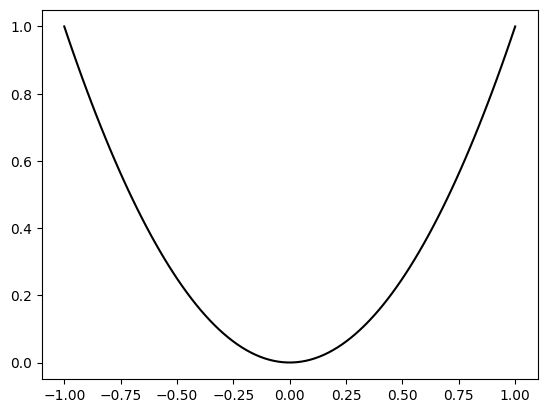

In [3]:
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x)
plt.figure()
plt.plot(x,y, "k")
plt.show()

In [4]:
spot_1 = spot.Spot(fun=fun,
                   lower = np.array([-10]),
                   upper = np.array([100]),
                   fun_evals = 7,
                   fun_repeats = 1,
                   max_time = inf,
                   noise = False,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type=["num"],
                   infill_criterion = "y",
                   n_points = 1,
                   seed=123,
                   log_level = 50,
                   show_models=True,
                   fun_control = {},
                   design_control={"init_size": 5,
                                   "repeats": 1},
                   surrogate_control={"noise": False,
                                      "cod_type": "norm",
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": 1,
                                      "model_optimizer": differential_evolution,
                                      "model_fun_evals": 1000,
                                      })

* `spot`'s  `__init__` method sets the control parameters. There are two parameter groups:

1. external parameters can be specified by the user
2. internal parameters, which are handled by `spot`.


### External Parameters

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `fun` | object |objective function | | yes |
| `lower` | array | lower bound | | yes |
| `upper` | array | upper bound | | yes |
| `fun_evals`| int | number of function evaluations | 15 | no |
| `fun_evals`| int | number of function evaluations | 15 | no |
| `fun_control` | dict | noise etc. | {} | n |
| `max_time` | int | max run time budget | `inf` | no |
| `noise`| bool | if repeated evaluations of `fun` results in different values, then `noise` should be set to `True`. | `False`| no|
| `tolerance_x`| float | tolerance for new x solutions. Minimum distance of new solutions, generated by `suggest_new_X`, to already existing solutions. If zero (which is the default), every new solution is accepted. | `0` | no|
| `var_type` | list | list of type information, can be either `"num"` or `"factor"` | `["num"]` | no |
| `infill_criterion`| string | Can be `"y"`, `"s"`, `"ei"` (negative expected improvement), or `"all"`| `"y"` | no|
| `n_points`| int | number of infill points | 1 | no |
| `seed` | int | initial seed. If `Spot.run()` is called twice, different results will be generated. To reproduce results, the `seed` can be used. | `123` | no |
| `log_level`| int | log level with the following settings: `NOTSET` (`0`), `DEBUG` (`10`: Detailed information, typically of interest only when diagnosing problems.), `INFO` (`20`: Confirmation that things are working as expected.), `WARNING` (`30`: An indication that something unexpected happened, or indicative of some problem in the near future (e.g. ‘disk space low’). The software is still working as expected.), `ERROR` (`40`: Due to a more serious problem, the software has not been able to perform some function.), and `CRITICAL` (`50`: A serious error, indicating that the program itself may be unable to continue running.)| `50` | no |
| `show_models` | bool | Plot model. Currently only 1-dim functions are supported | `False` | no|
| `design`| object | experimental design | `None` | no |
| `design_control` | dict | control parameters | see below | no|
| `surrogate` | | surrogate model | `kriging` | no |
| `surrogate_control` | dict | control parameters | see below | no|
| `optimizer` | object | optimizer | see below | no|
| `optimizer_control` | dict | control parameters | see below | no|

* Besides these single parameters, the following parameter dictionaries can be specified by the user:
  * `fun_control`
  * `design_control`
  * `surrogate_control`
  * `optimizer_control`

## The `fun_control` Dictionary

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `sigma` | float | noise: standard deviation | `0` | yes |
| `seed` | int | seed for rng | `124` | yes |


## The `design_control` Dictionary

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `init_size` | int | initial sample size | `10` | yes |
| `repeats` | int | number of repeats of the initial sammples | `1` | yes |


## The `surrogate_control` Dictionary

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `noise`
| `model_optimizer` | object | optimizer | `differential_evolution` | no |
| `model_fun_evals` | | | | |
| `min_theta` | | | `-3.`| |
| `max_theta` | | | `3.` | |
| `n_theta`   | | | `1` | |
| `n_p`       | | | `1` | | 
| `optim_p`   | | | `False` | |
| `cod_type`  | | | `"norm"` | |
| `var_type`  | | | | |
| `use_cod_y` | bool | |`False`| |

## The `optimizer_control` Dictionary

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `max_iter` | int | max number of iterations. Note: these are the cheap evaluations on the surrogate. | `1000` | no |

## Run

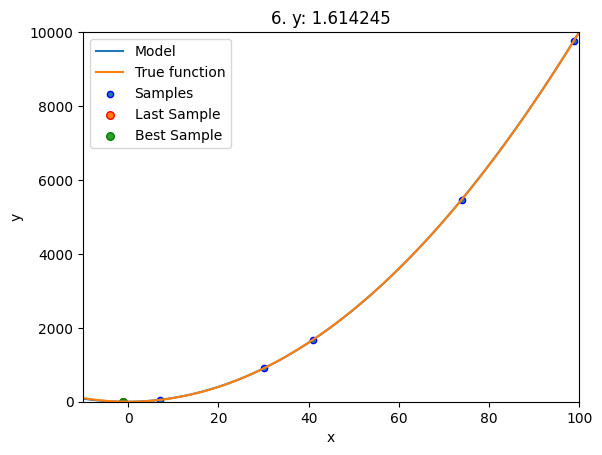

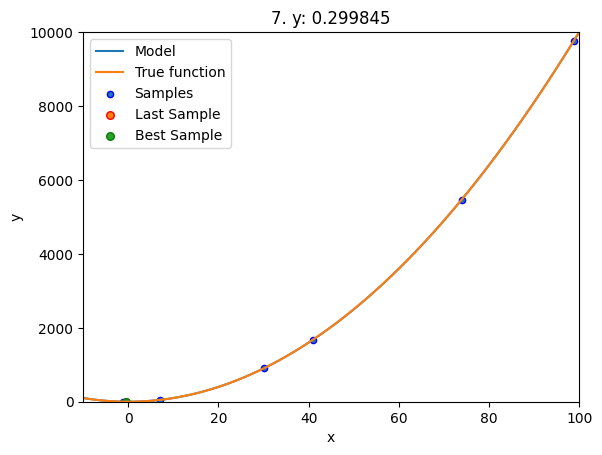

In [5]:
spot_1.run()

## Print the Results

In [6]:
spot_1.print_results()

min y: 0.29984480579304645
x0: -0.5475808668982568


## Show the Progress

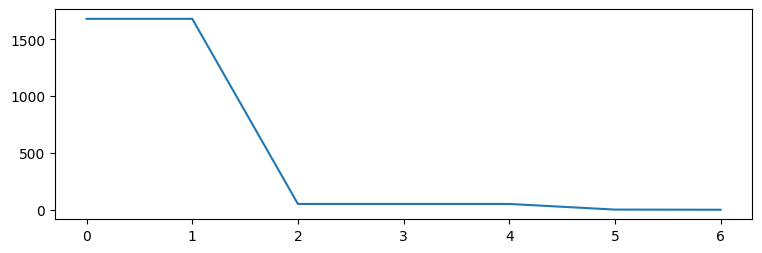

In [7]:
spot_1.plot_progress()

## Visualize the Surrogate

* The plot method of the `kriging` surrogate is used.
* Note: the plot uses the interval defined by the ranges of the natural variables.

<Figure size 900x600 with 0 Axes>

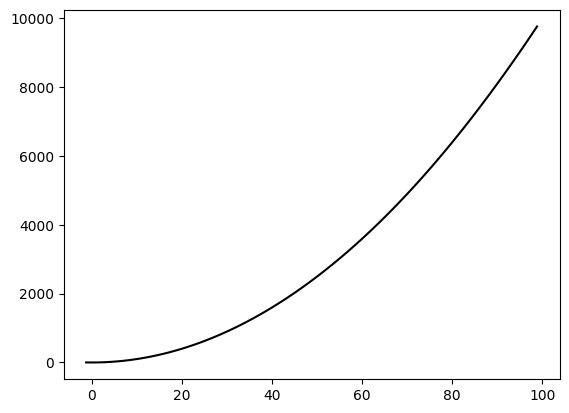

In [8]:
spot_1.surrogate.plot()

## 1. Init: Build Initial Design

In [9]:
from spotPython.design.spacefilling import spacefilling
from spotPython.build.kriging import Kriging
from spotPython.fun.objectivefunctions import analytical
gen = spacefilling(2)
rng = np.random.RandomState(1)
lower = np.array([-5,-0])
upper = np.array([10,15])
fun = analytical().fun_branin
fun_control = {"sigma": 0,
               "seed": 123}

X = gen.scipy_lhd(10, lower=lower, upper = upper)
print(X)
y = fun(X, fun_control=fun_control)
print(y)

[[ 8.97647221 13.41926847]
 [ 0.66946019  1.22344228]
 [ 5.23614115 13.78185824]
 [ 5.6149825  11.5851384 ]
 [-1.72963184  1.66516096]
 [-4.26945568  7.1325531 ]
 [ 1.26363761 10.17935555]
 [ 2.88779942  8.05508969]
 [-3.39111089  4.15213772]
 [ 7.30131231  5.22275244]]
[128.95676449  31.73474356 172.89678121 126.71295908  64.34349975
  70.16178611  48.71407916  31.77322887  76.91788181  30.69410529]


## Replicability

* Seed

In [10]:
gen = spacefilling(2, seed=123)
X0 = gen.scipy_lhd(3)
gen = spacefilling(2, seed=345)
X1 = gen.scipy_lhd(3)
X2 = gen.scipy_lhd(3)
gen = spacefilling(2, seed=123)
X3 = gen.scipy_lhd(3)
X0, X1, X2, X3

(array([[0.77254938, 0.31539299],
        [0.59321338, 0.93854273],
        [0.27469803, 0.3959685 ]]),
 array([[0.78373509, 0.86811887],
        [0.06692621, 0.6058029 ],
        [0.41374778, 0.00525456]]),
 array([[0.121357  , 0.69043832],
        [0.41906219, 0.32838498],
        [0.86742658, 0.52910374]]),
 array([[0.77254938, 0.31539299],
        [0.59321338, 0.93854273],
        [0.27469803, 0.3959685 ]]))

## Surrogates

### A Simple Predictor

The code below shows how to use a simple model for prediction.

* Assume that only two (very costly) measurements are available:
  
  1. f(0) = 0.5
  2. f(2) = 2.5

* We are interested in the value at $x_0 = 1$, i.e., $f(x_0 = 1)$, but cannot run an additional, third experiment.

In [11]:
from sklearn import linear_model
X = np.array([[0], [2]])
y = np.array([0.5, 2.5])
S_lm = linear_model.LinearRegression()
S_lm = S_lm.fit(X, y)
X0 = np.array([[1]])
y0 = S_lm.predict(X0)
print(y0)


[1.5]


* Central Idea:
  * Evaluation of the surrogate model `S_lm` is much cheaper (or / and much faster) than running the real-world experiment $f$.

## Demo/Test: Objective Function Fails

* SPOT expects `np.nan` values from failed objective function values.
* These are handled.
* Note: SPOT's counter considers only successful executions of the objective function.

In [12]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
import numpy as np
from math import inf
# number of initial points:
ni = 20
# number of points
n = 30

fun = analytical().fun_random_error
lower = np.array([-1])
upper = np.array([1])
design_control={"init_size": ni}

spot_1 = spot.Spot(fun=fun,
            lower = lower,
            upper= upper,
            fun_evals = n,
            show_progress=False,
            design_control=design_control,)
spot_1.run()
# To check whether the run was successfully completed,
# we compare the number of evaluated points to the specified
# number of points.
assert spot_1.y.shape[0] == n


[ 0.53176481         nan -0.02203599 -0.21843718  0.78240941 -0.58120945
 -0.3923345   0.67234256  0.31802454 -0.68898927 -0.75129705  0.97550354
  0.41757584  0.0786237   0.82585329  0.23700598 -0.49274073 -0.82319082
 -0.17991251  0.1481835 ]
[-1.]
[0.17335968]
[-0.58552368]
[-0.20126111]
[-0.60100809]
[-0.97897336]
[-0.2748985]
[0.8359486]
[0.99035591]
[0.01641232]
[0.5629346]
